In [ ]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Get the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-04-08 11:13:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.128, 142.250.145.128, 74.125.143.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  32.2MB/s    in 3.2s    

2023-04-08 11:13:39 (32.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# Unzip the file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

# Now the document is stored, check the drive tab on the left to see

original dataset
https://www.kaggle.com/datasets/dansbecker/food-101

In [ ]:
# Inspect the data
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
# Finding total count
import os

# Using walk function
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories/folders and {len(filenames)} images in '{dirpath}'.")

There are 2 directories/folders and 0 images in 'pizza_steak'.
There are 2 directories/folders and 0 images in 'pizza_steak/train'.
There are 0 directories/folders and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories/folders and 750 images in 'pizza_steak/train/steak'.
There are 2 directories/folders and 0 images in 'pizza_steak/test'.
There are 0 directories/folders and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories/folders and 250 images in 'pizza_steak/test/steak'.


In [ ]:
# another way
pizza_train = len(os.listdir("/content/pizza_steak/train/pizza"))
pizza_train

750

#  Visualisation

In [ ]:
# Get the classnames programmatically

import pathlib
import numpy as np

data_dir = pathlib.Path("/content/pizza_steak/train") # assign the path

class_names = np.array(sorted([i.name for i in data_dir.glob("*")])) # Use i.name to get only the name of the folder
print(class_names)

['pizza' 'steak']


In [ ]:
# Lets visualise

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class
  print(target_folder)

  # get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read the image and plot using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("on");

  print(f"Image shape: {img.shape}") # dispplay shape
  
  return img

/content/pizza_steak/train/pizza
['2019441.jpg']
Image shape: (512, 512, 3)


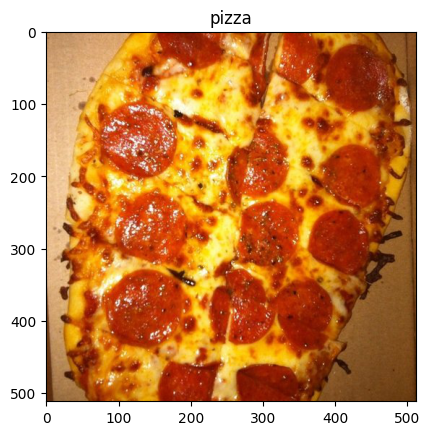

In [ ]:
img = view_random_image(target_dir = "/content/pizza_steak/train/",
                        target_class = "pizza")

In [ ]:
img

array([[[179, 131,  85],
        [186, 138,  92],
        [191, 143,  97],
        ...,
        [131,  77,  31],
        [133,  79,  33],
        [134,  80,  34]],

       [[182, 134,  88],
        [189, 141,  95],
        [195, 147, 101],
        ...,
        [130,  76,  30],
        [129,  75,  29],
        [130,  76,  30]],

       [[181, 133,  87],
        [187, 139,  93],
        [193, 145,  99],
        ...,
        [129,  75,  29],
        [129,  75,  29],
        [131,  77,  31]],

       ...,

       [[ 93,  44,  14],
        [ 93,  44,  14],
        [ 92,  45,  17],
        ...,
        [ 96,  56,  21],
        [ 87,  49,  13],
        [ 78,  39,   6]],

       [[ 93,  44,  14],
        [ 94,  45,  15],
        [ 92,  45,  17],
        ...,
        [ 98,  58,  23],
        [ 89,  51,  15],
        [ 80,  41,   8]],

       [[ 93,  44,  14],
        [ 94,  45,  15],
        [ 92,  45,  17],
        ...,
        [ 93,  53,  18],
        [ 83,  45,   9],
        [ 75,  36,   3]]

In [ ]:
# Turn to tensor
tf.constant(img, dtype = tf.float32)

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[179., 131.,  85.],
        [186., 138.,  92.],
        [191., 143.,  97.],
        ...,
        [131.,  77.,  31.],
        [133.,  79.,  33.],
        [134.,  80.,  34.]],

       [[182., 134.,  88.],
        [189., 141.,  95.],
        [195., 147., 101.],
        ...,
        [130.,  76.,  30.],
        [129.,  75.,  29.],
        [130.,  76.,  30.]],

       [[181., 133.,  87.],
        [187., 139.,  93.],
        [193., 145.,  99.],
        ...,
        [129.,  75.,  29.],
        [129.,  75.,  29.],
        [131.,  77.,  31.]],

       ...,

       [[ 93.,  44.,  14.],
        [ 93.,  44.,  14.],
        [ 92.,  45.,  17.],
        ...,
        [ 96.,  56.,  21.],
        [ 87.,  49.,  13.],
        [ 78.,  39.,   6.]],

       [[ 93.,  44.,  14.],
        [ 94.,  45.,  15.],
        [ 92.,  45.,  17.],
        ...,
        [ 98.,  58.,  23.],
        [ 89.,  51.,  15.],
        [ 80.,  41.,   8.]],

       [[ 93.,  4

In [ ]:
img.shape

(512, 512, 3)

In [ ]:
# Normalisation - to make all the value between 0 and 1
img/255

array([[[0.70196078, 0.51372549, 0.33333333],
        [0.72941176, 0.54117647, 0.36078431],
        [0.74901961, 0.56078431, 0.38039216],
        ...,
        [0.51372549, 0.30196078, 0.12156863],
        [0.52156863, 0.30980392, 0.12941176],
        [0.5254902 , 0.31372549, 0.13333333]],

       [[0.71372549, 0.5254902 , 0.34509804],
        [0.74117647, 0.55294118, 0.37254902],
        [0.76470588, 0.57647059, 0.39607843],
        ...,
        [0.50980392, 0.29803922, 0.11764706],
        [0.50588235, 0.29411765, 0.11372549],
        [0.50980392, 0.29803922, 0.11764706]],

       [[0.70980392, 0.52156863, 0.34117647],
        [0.73333333, 0.54509804, 0.36470588],
        [0.75686275, 0.56862745, 0.38823529],
        ...,
        [0.50588235, 0.29411765, 0.11372549],
        [0.50588235, 0.29411765, 0.11372549],
        [0.51372549, 0.30196078, 0.12156863]],

       ...,

       [[0.36470588, 0.17254902, 0.05490196],
        [0.36470588, 0.17254902, 0.05490196],
        [0.36078431, 0

# Building a CNN model

* Load our images
* Preprocess the image
* Build CNN
* Compile CNN
* Fit CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Set random seed
tf.random.set_seed(42)

# preprocess data(compressing values between 0 and 1, also called scaling/ normalization)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup path to our dir
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"


# Import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

# Building a CNN model (same as tiny VGG)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
    
    tf.keras.layers.Conv2D(10,3, activation = "relu"),
    tf.keras.layers.Conv2D(10,3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2, padding = "valid"),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid") # Creates the neural network
])


# Commpile CNN
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fitting our model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 26s 244ms/step - loss: 0.5487 - accuracy: 0.7287 - val_loss: 0.4504 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 10s 224ms/step - loss: 0.4794 - accuracy: 0.7793 - val_loss: 0.4134 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4264 - accuracy: 0.8093 - val_loss: 0.3792 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 12s 234ms/step - loss: 0.3979 - accuracy: 0.8253 - val_loss: 0.3131 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 11s 226ms/step - loss: 0.3396 - accuracy: 0.8553 - val_loss: 0.3126 - val_accuracy: 0.8640


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

https://poloclub.github.io/cnn-explainer/#article-relu

https://playground.tensorflow.org/#activation=relu&regularization=L1&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.1&regularizationRate=0.001&noise=0&networkShape=4,2&seed=0.07557&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [ ]:
# Trying a different NN

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"]
                )
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 218ms/step - loss: 0.8643 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 212ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 195ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 193ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 213ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
500000000000/600000

833333.3333333334

In [ ]:
sec = 2.5*833333.3333333334
min = sec/60
hour = min/60
day = hour/24
year = day/365
day

24.11265432098766

In [ ]:
# TYrying a different NN

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"]
                )
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 215ms/step - loss: 2.5065 - accuracy: 0.6500 - val_loss: 0.6883 - val_accuracy: 0.7180
Epoch 2/5
47/47 [==============================] - 10s 212ms/step - loss: 1.1385 - accuracy: 0.6840 - val_loss: 1.3914 - val_accuracy: 0.6500
Epoch 3/5
47/47 [==============================] - 10s 210ms/step - loss: 0.8225 - accuracy: 0.7213 - val_loss: 0.5275 - val_accuracy: 0.7680
Epoch 4/5
47/47 [==============================] - 9s 190ms/step - loss: 0.5879 - accuracy: 0.7600 - val_loss: 0.6013 - val_accuracy: 0.7640
Epoch 5/5
47/47 [==============================] - 10s 210ms/step - loss: 0.6010 - accuracy: 0.7600 - val_loss: 1.2055 - val_accuracy: 0.5880


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


# Model3 has better results than model2, but the parameters are 500 times more than it and no where close to CNN

# Increasing dense gives better results, but trainable params is bigger

/content/pizza_steak/train/steak
['1710569.jpg']
Image shape: (306, 512, 3)
/content/pizza_steak/train/pizza
['2486277.jpg']
Image shape: (512, 512, 3)
/content/pizza_steak/train/pizza
['34632.jpg']
Image shape: (384, 512, 3)


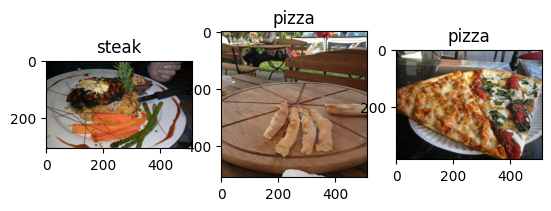

In [ ]:
# Visualise the data

plt.figure()
plt.subplot(1,3,1)
steak_img = view_random_image("/content/pizza_steak/train/","steak")

plt.subplot(1,3,2)
pizza_img = view_random_image("/content/pizza_steak/train/", "pizza")

plt.subplot(1,3,3)
pizza_img = view_random_image("/content/pizza_steak/train/", "pizza")


# Breaking down

Preprocessing

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = "binary",
                                            seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of train_data batch

images, labels = train_data.next()
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

In [ ]:
len(images), len(labels)

(32, 32)

In [ ]:
len(train_data), 1500/32

(47, 46.875)

In [ ]:
images[:2], images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.31764707, 0.3254902 , 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34901962, 0.37254903],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.37647063],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.37254903, 0.39607847, 0.29411766],
          [0.39607847, 0.41960788, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.3019608 ],
          [0.30980393, 0.29803923, 0.27058825],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

# Creating a model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
model_4 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides = 1,
           padding = "valid",
           activation = "relu",
           input_shape = (224,224,3)),
    Conv2D(10,3,activation = 'relu'),
    Conv2D(10,3,activation = 'relu'),
    Flatten(),
    Dense(1,activation = 'sigmoid')
])

In [ ]:
# Optimise the model

model_4.compile(optimizer = Adam(),
                loss = "binary_crossentropy",
                metrics = ["accuracy"])

In [ ]:
len(train_data), len(valid_data)

(47, 16)

In [ ]:
#Fit the model

hisory_4 = model_4.fit(train_data,
                       epochs = 5,
                       steps_per_epoch = len(train_data),
                       validation_data = valid_data,
                       validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 232ms/step - loss: 1.2310 - accuracy: 0.6473 - val_loss: 0.4537 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 11s 226ms/step - loss: 0.4014 - accuracy: 0.8220 - val_loss: 0.3724 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 10s 222ms/step - loss: 0.2692 - accuracy: 0.8900 - val_loss: 0.3620 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 10s 203ms/step - loss: 0.1164 - accuracy: 0.9680 - val_loss: 0.3675 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 10s 216ms/step - loss: 0.0345 - accuracy: 0.9947 - val_loss: 0.4469 - val_accuracy: 0.8260


In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
15073201/477341

31.57742787650757

# Adding Conv layers has reduced params size by 31 times

In [ ]:
# Evaluation

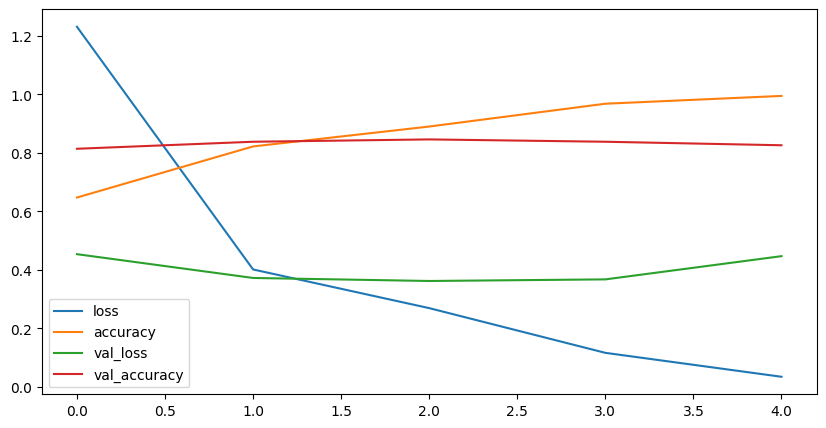

In [ ]:
import pandas as pd
pd.DataFrame(hisory_4.history).plot(figsize = (10,5));

In [ ]:
hisory_4.history

{'loss': [1.231036901473999,
  0.4014102518558502,
  0.26920968294143677,
  0.11636806279420853,
  0.03454189747571945],
 'accuracy': [0.6473333239555359,
  0.8220000267028809,
  0.8899999856948853,
  0.9679999947547913,
  0.9946666955947876],
 'val_loss': [0.453684002161026,
  0.3723575472831726,
  0.3620102107524872,
  0.36748412251472473,
  0.44688019156455994],
 'val_accuracy': [0.8140000104904175,
  0.8379999995231628,
  0.8460000157356262,
  0.8379999995231628,
  0.8259999752044678]}

In [ ]:
epochs = range(len(hisory_4.history["loss"]))
epochs

range(0, 5)

In [ ]:
# Plot

def plot_function(history):
  loss = history.history["loss"]
  accuracy = history.history["accuracy"]
  val_loss = history.history["val_loss"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.figure()
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label = "training accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()



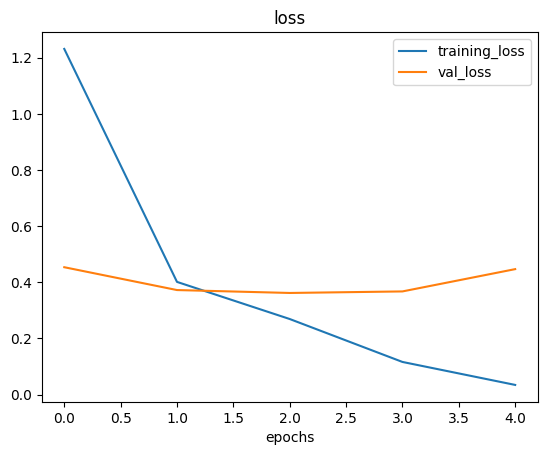

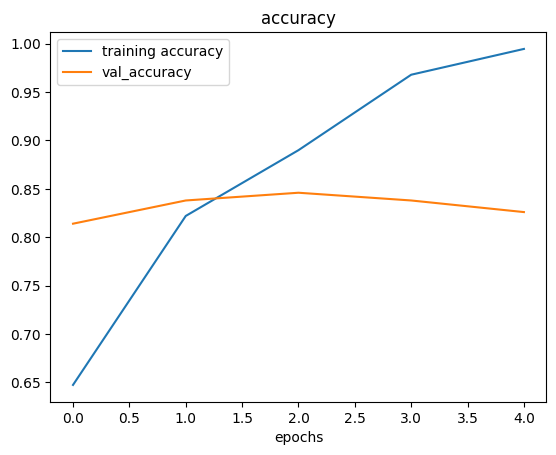

In [ ]:
plot_function(hisory_4)

# The validation loss is increasing as because of 'overfitting' problem, so we need to generalise

Ways to induce overfitting:

* Increase no. of layers
* Increase no. of conv layers
* Add another dense layer

Reduce overfitting:

* Add data augumentation
* Add maxpool layers(regularisation layers)
* add more data

In [ ]:
model_5 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),

    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),

    Flatten(),
    Dense(1, activation = 'sigmoid')
])

In [ ]:
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ['accuracy'])

In [ ]:
history_5 = model_5.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 203ms/step - loss: 0.6456 - accuracy: 0.6173 - val_loss: 0.5758 - val_accuracy: 0.7080
Epoch 2/5
47/47 [==============================] - 10s 209ms/step - loss: 0.5319 - accuracy: 0.7420 - val_loss: 0.4280 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 10s 211ms/step - loss: 0.4361 - accuracy: 0.7993 - val_loss: 0.3552 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 10s 212ms/step - loss: 0.3861 - accuracy: 0.8373 - val_loss: 0.3546 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 10s 213ms/step - loss: 0.3719 - accuracy: 0.8507 - val_loss: 0.3049 - val_accuracy: 0.8720


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
477341/8861

53.86987924613475

# The number of parameters have reduced 53 times just with max pool and additional conv layers

In [ ]:
history_5.history

{'loss': [0.6456232666969299,
  0.5318865776062012,
  0.43611815571784973,
  0.38614946603775024,
  0.3719143569469452],
 'accuracy': [0.6173333525657654,
  0.7419999837875366,
  0.7993333339691162,
  0.8373333215713501,
  0.8506666421890259],
 'val_loss': [0.5758354663848877,
  0.42800626158714294,
  0.3552216589450836,
  0.35458487272262573,
  0.3049071133136749],
 'val_accuracy': [0.7080000042915344,
  0.8040000200271606,
  0.8479999899864197,
  0.8479999899864197,
  0.871999979019165]}

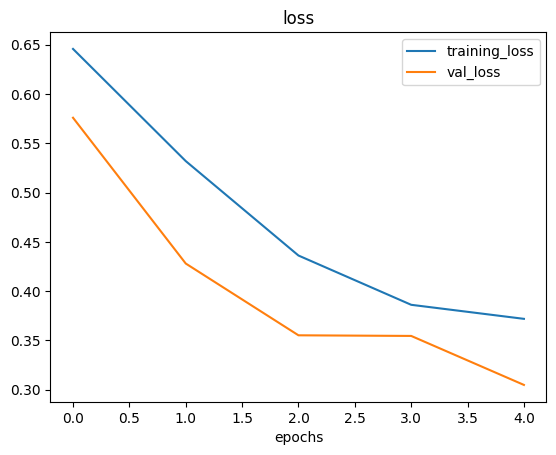

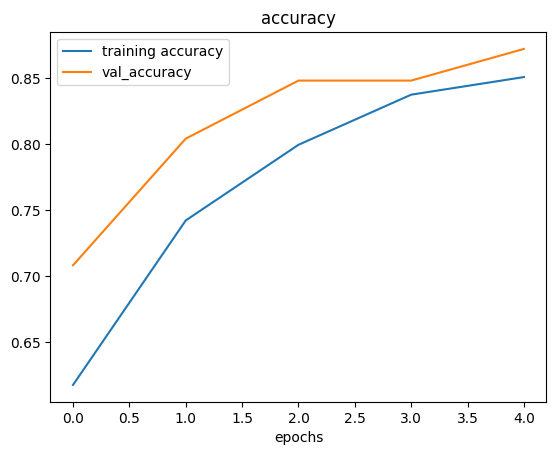

In [ ]:
plot_function(history_5)

# Using data augumentation to handle overfitting

In [ ]:
train_datagen_augumented = ImageDataGenerator(rescale = 1/255.,
                                              rotation_range = 0.2,
                                              shear_range = 0.2,
                                              zoom_range = 0.2,
                                              width_shift_range = 0.2,
                                              height_shift_range = 0.3,
                                              horizontal_flip = True)

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
print("The agumented train data is ")
train_datagen_augumented = train_datagen_augumented.flow_from_directory(directory = train_dir,
                                                                        target_size = (224,224),
                                                                        batch_size = 32,
                                                                        class_mode = "binary",
                                                                        shuffle = False)

The agumented train data is 
Found 1500 images belonging to 2 classes.


In [ ]:


print("The non - agumented train data is ")
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle = False)

print("The non - agumented test data is ")
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "binary")


The non - agumented train data is 
Found 1500 images belonging to 2 classes.
The non - agumented test data is 
Found 500 images belonging to 2 classes.


In [ ]:
# get sample batches
images, labels = train_data.next()
aug_images, aug_labels = train_datagen_augumented.next()

aug_images[0].shape , images[0].shape, aug_images[:1], images[:1]

((224, 224, 3),
 (224, 224, 3),
 array([[[[0.47018933, 0.43909603, 0.29811904],
          [0.47010514, 0.4390708 , 0.29813588],
          [0.47002095, 0.4390455 , 0.2981527 ],
          ...,
          [0.5780014 , 0.46815562, 0.23934919],
          [0.59506243, 0.4810566 , 0.244398  ],
          [0.57883525, 0.46310553, 0.22838306]],
 
         [[0.47058827, 0.43293455, 0.2917581 ],
          [0.47058827, 0.43295142, 0.29177493],
          [0.47058827, 0.43296826, 0.29179177],
          ...,
          [0.5707441 , 0.4780377 , 0.2442248 ],
          [0.59670347, 0.48607218, 0.24504542],
          [0.5688829 , 0.4512358 , 0.21270818]],
 
         [[0.4801861 , 0.42657366, 0.28539717],
          [0.48015243, 0.4265905 , 0.285414  ],
          [0.48011875, 0.4266073 , 0.28543085],
          ...,
          [0.5719919 , 0.48428044, 0.25136936],
          [0.59389806, 0.484575  , 0.24380022],
          [0.5698189 , 0.45186308, 0.21429127]],
 
         ...,
 
         [[0.40000004, 0.454902  ,

In [ ]:
labels[0], aug_images[0]

(0.0,
 array([[[0.47018933, 0.43909603, 0.29811904],
         [0.47010514, 0.4390708 , 0.29813588],
         [0.47002095, 0.4390455 , 0.2981527 ],
         ...,
         [0.5780014 , 0.46815562, 0.23934919],
         [0.59506243, 0.4810566 , 0.244398  ],
         [0.57883525, 0.46310553, 0.22838306]],
 
        [[0.47058827, 0.43293455, 0.2917581 ],
         [0.47058827, 0.43295142, 0.29177493],
         [0.47058827, 0.43296826, 0.29179177],
         ...,
         [0.5707441 , 0.4780377 , 0.2442248 ],
         [0.59670347, 0.48607218, 0.24504542],
         [0.5688829 , 0.4512358 , 0.21270818]],
 
        [[0.4801861 , 0.42657366, 0.28539717],
         [0.48015243, 0.4265905 , 0.285414  ],
         [0.48011875, 0.4266073 , 0.28543085],
         ...,
         [0.5719919 , 0.48428044, 0.25136936],
         [0.59389806, 0.484575  , 0.24380022],
         [0.5698189 , 0.45186308, 0.21429127]],
 
        ...,
 
        [[0.40000004, 0.454902  , 0.3254902 ],
         [0.40000004, 0.454902  , 0

In [ ]:
len(images), len(labels), len(aug_images), len(aug_labels)

(32, 32, 32, 32)

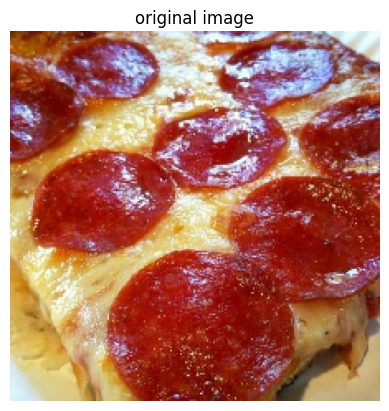

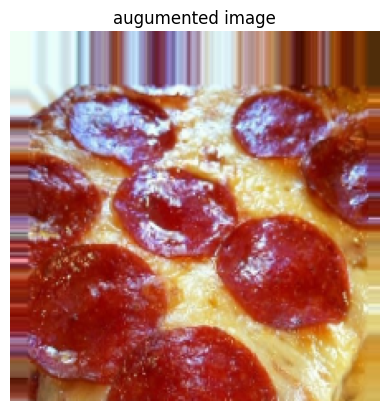

In [ ]:
import random
random_number = random.randint(0,32)

plt.figure()
plt.imshow(images[random_number])
plt.title("original image")
plt.axis(False)

plt.figure()
plt.imshow(aug_images[random_number])
plt.title("augumented image")
plt.axis(False);

In [ ]:
# lets build a model

model_6 = Sequential([
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

history_6 = model_6.fit(train_datagen_augumented,
                        epochs = 5,
                        steps_per_epoch = len(train_datagen_augumented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 508ms/step - loss: 0.7236 - accuracy: 0.4327 - val_loss: 0.6906 - val_accuracy: 0.5900
Epoch 2/5
47/47 [==============================] - 24s 514ms/step - loss: 0.6959 - accuracy: 0.4733 - val_loss: 0.6899 - val_accuracy: 0.6000
Epoch 3/5
47/47 [==============================] - 24s 512ms/step - loss: 0.6925 - accuracy: 0.5193 - val_loss: 0.6830 - val_accuracy: 0.6940
Epoch 4/5
47/47 [==============================] - 24s 510ms/step - loss: 0.6880 - accuracy: 0.5840 - val_loss: 0.6600 - val_accuracy: 0.7540
Epoch 5/5
47/47 [==============================] - 24s 504ms/step - loss: 0.6710 - accuracy: 0.6233 - val_loss: 0.6520 - val_accuracy: 0.7560


In [ ]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, None, None, 10)    280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, None, None, 10)  

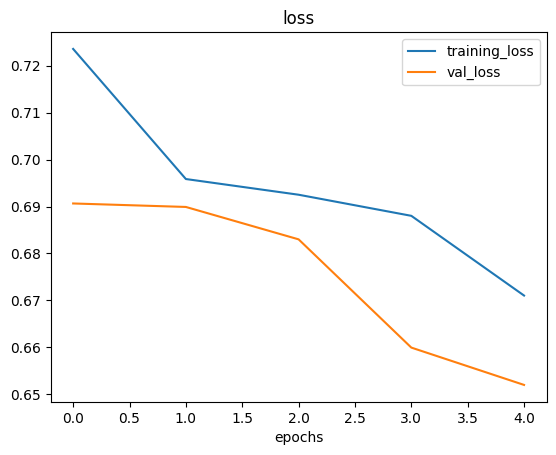

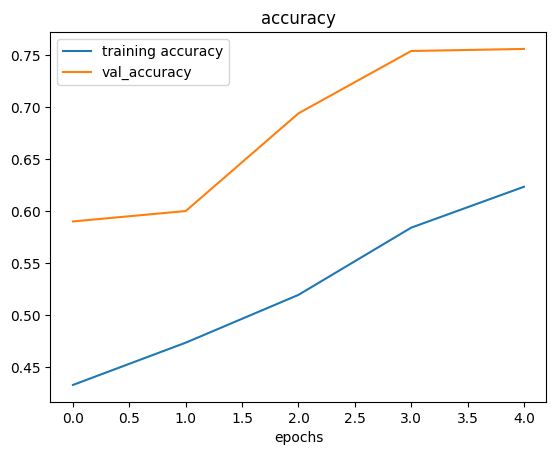

In [ ]:
plot_function(history_6)

# Despite the augumentation, overfitting seems resolved(low val loss), but the accuracy is worse tha before

# shuffle the data and try one more time

In [ ]:
train_datagen_augumented = ImageDataGenerator(rescale = 1/255.,
                                              rotation_range = 0.2,
                                              shear_range = 0.2,
                                              zoom_range = 0.2,
                                              width_shift_range = 0.2,
                                              height_shift_range = 0.3,
                                              horizontal_flip = True)

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

print("The agumented train data is ")
train_datagen_augumented_shuffled = train_datagen_augumented.flow_from_directory(directory = train_dir,
                                                                        target_size = (224,224),
                                                                        batch_size = 32,
                                                                        class_mode = "binary",
                                                                        shuffle = True)

The agumented train data is 
Found 1500 images belonging to 2 classes.


In [ ]:
history_7= model_6.fit(train_datagen_augumented_shuffled,
                        epochs = 5,
                        steps_per_epoch = len(train_datagen_augumented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 516ms/step - loss: 0.6215 - accuracy: 0.6733 - val_loss: 0.4683 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 24s 513ms/step - loss: 0.5500 - accuracy: 0.7307 - val_loss: 0.4312 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 24s 509ms/step - loss: 0.5332 - accuracy: 0.7413 - val_loss: 0.4810 - val_accuracy: 0.7660
Epoch 4/5
47/47 [==============================] - 25s 525ms/step - loss: 0.5171 - accuracy: 0.7587 - val_loss: 0.3831 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 24s 515ms/step - loss: 0.4871 - accuracy: 0.7793 - val_loss: 0.3278 - val_accuracy: 0.8720


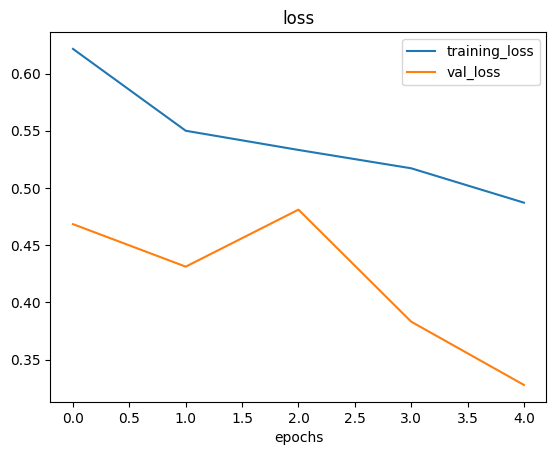

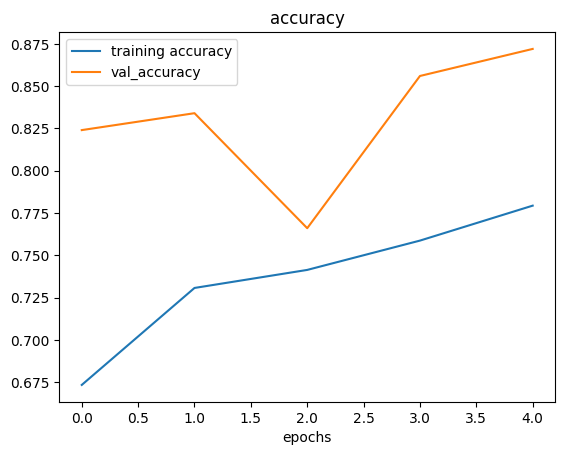

In [ ]:
plot_function(history_7)

# The loss and accuracy has improved, just by changing the shuffle to true

# Now

* Increase model layers ( more conv2D and poollayers)
* Increase, no of filters 
* Increase epochs
* Ideal learning rate
* More data
* Use Transfer learning

# Making a prediction with our trained model

In [ ]:
print(class_names)

['pizza' 'steak']


--2023-04-08 11:23:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2023-04-08 11:23:53 (88.6 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



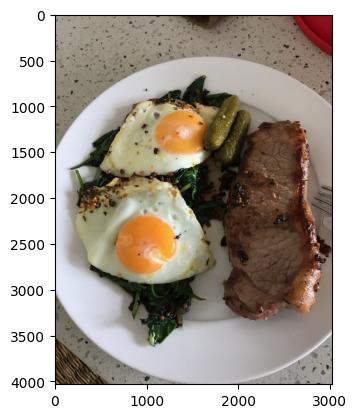

In [ ]:
# View an example
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak);

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
model_6.predict(steak)

ValueError: ignored

In [ ]:
# Adding extra dimentions

expanded_steak = tf.expand_dims(steak, axis = 0)
expanded_steak.shape

TensorShape([1, 4032, 3024, 3])

In [ ]:
model_6.predict(expanded_steak)

ValueError: ignored

In [ ]:
# We need to change the image to the same size as our model was trained

def load_and_prep_image(filename, img_shape = 224):
  img = tf.io.read_file(filename) # reads the image
  img = tf.image.decode_image(img) # decodes the image to tensor
  img = tf.image.resize(img, size = [img_shape, img_shape]) # Resize
  img = img/255.
  return img



In [ ]:
new_steak = load_and_prep_image("03-steak.jpeg")
new_steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_6.predict(tf.expand_dims(new_steak, axis = 0))
pred

1/1 [==============================] - 0s 199ms/step


array([[0.81245446]], dtype=float32)

In [ ]:
# It gives the probability, what if we can make it say what it is 

print(class_names)

['pizza' 'steak']


In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_plot(model, filename, class_names = class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis = 0))
  pred_class = class_names[int(tf.round(pred))]

  # plot the image
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 36ms/step


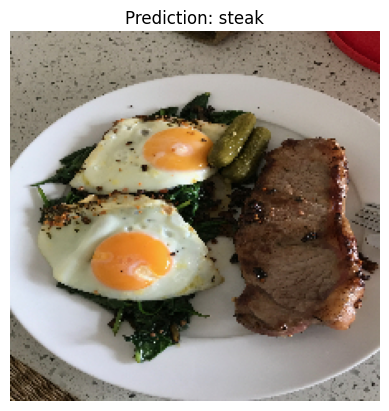

In [ ]:
pred_plot(model_6, "03-steak.jpeg", class_names)

--2023-04-08 11:24:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2023-04-08 11:24:23 (111 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 207ms/step


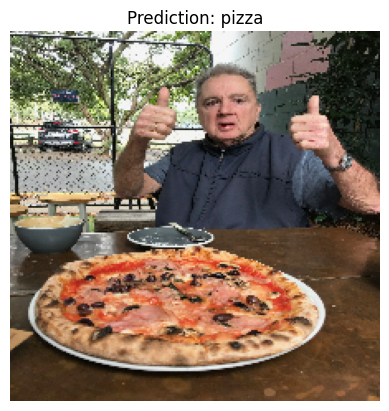

In [ ]:
# Lets predict a new one

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_plot(model_1, "03-pizza-dad.jpeg", class_names)